# Exercise 1: Simple Content-based Image Retrieval (3 Points)
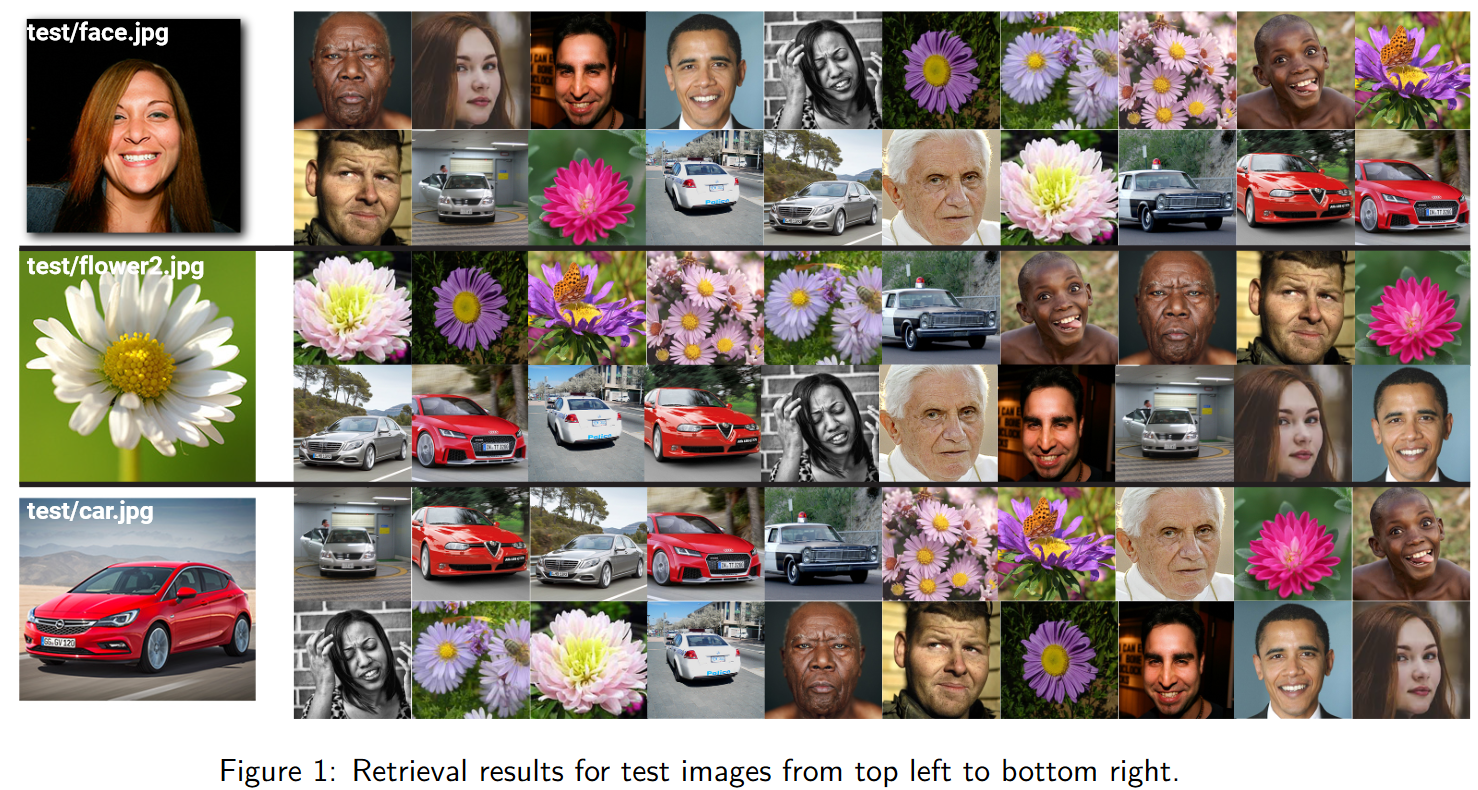






4 query images found!
20 database images found!
indices_min  [ 0  5  3  1  4 17 16 19 15  9 18 13  7  2 11  8 14  6 10 12]
indices_min  [11 12 14  6 10 19  7 17 16 13  2  8  0 15  3 18  9  1  4  5]
indices_min  [16 17 19 14 18  7  9 13 11  8  1  2 15  0  3  4  5  6 12 10]
indices_min  [18 14 16 19 17  1 11 15 13  3  8  2  4  5  9  7  0 12  6 10]
Query Image:


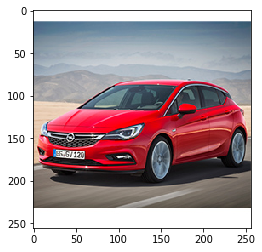


Closest Images in Data Base:


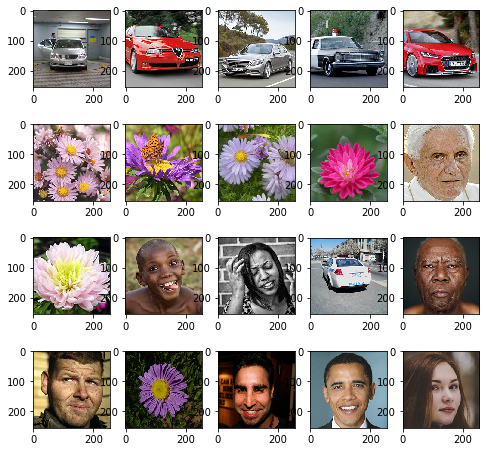

Query Image:


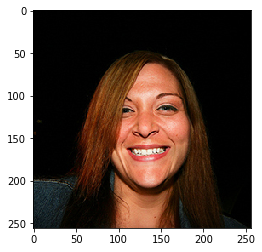


Closest Images in Data Base:


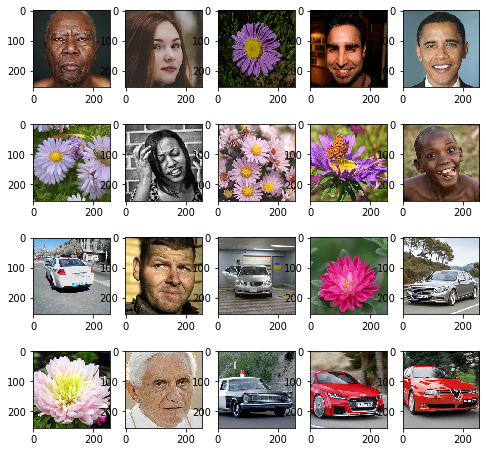

Query Image:


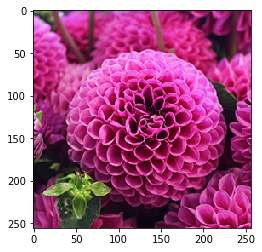


Closest Images in Data Base:


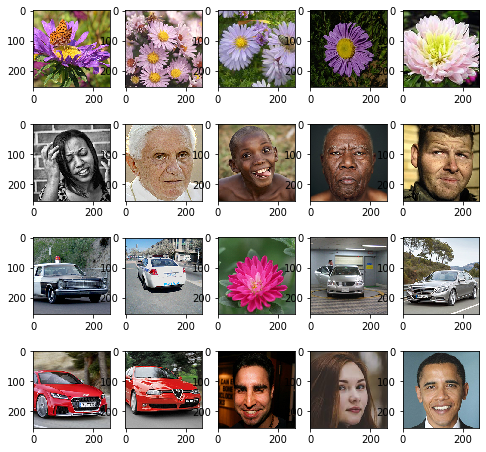

Query Image:


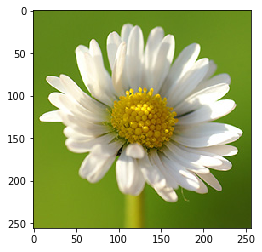


Closest Images in Data Base:


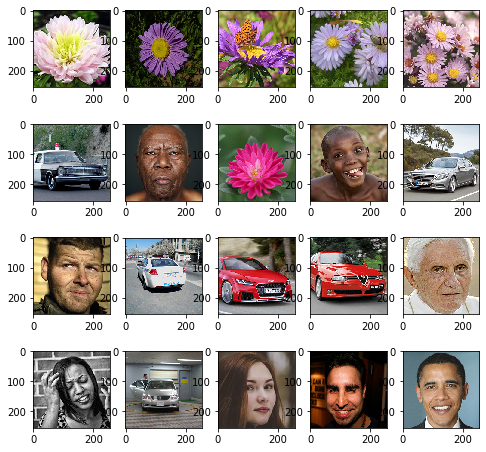

[None, None, None, None]

In [71]:
import cv2
import glob
from queue import PriorityQueue
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 

############################################################
#
#              Simple Image Retrieval
#
############################################################


# implement distance function
def distance(A, B):
    # YOUR CODE HERE
    # need to prevent integer overflow of numpy
    A = A.astype('int32')
    B = B.astype('int32')
    difference =(A-B)
    square_diff = difference*difference
    square_len = np.sum(square_diff, axis=1)
    length = np.sqrt(square_len)
#     print("A = \n", A)
#     print("B = \n", B)
#     print("Difference = \n", difference)
#     print("Squared Diff = \n", square_diff)
#     print("Square Length = \n", square_len)
#     print("Length = \n", length)
    return length


def create_keypoints(w, h):
    keypoints = []
    keypointSize = 11
    # YOUR CODE HERE
    grid_size = 16
    kp = []
    for y in range(grid_size-1):
        for x in range(grid_size-1):             
            keypoints.append(cv2.KeyPoint((y+1)*w//grid_size,\
                                   (x+1)*h//grid_size,\
                                   keypointSize))                    
    #keypoints.append(np.array(kp))
    return keypoints

def nearest_Images(query_image_descriptor,db_descriptors, number_of_db_imgs=20):
    # print("Test - Distance to itself:",sum(distance(query_image,descriptors[0])))
    distances = []
    for db_descriptor in db_descriptors:
        dist_kps = distance(query_image_descriptor,db_descriptor)
        overall_distance = np.sum(dist_kps, axis=0)
    #     print("dist_kps.shape",dist_kps.shape)
    #     print("overall_distance",overall_distance)
        distances.append(overall_distance)
    #     print("dist_kps = \n", dist_kps)
    #     print("overall_distance = \n",overall_distance)
    distances_np = np.array(distances)

    indices_min = distances_np.argsort()[:number_of_db_imgs]
    # print("Distances: ",(distances))
    print("indices_min ",indices_min)
    
    return indices_min

def display_nearest_Images(query_image, db_images, indices_min):
    print("==================================================================================")
    print("Query Image:")
    plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print()
    print("Closest Images in Data Base:")
    fig = plt.figure(figsize=(8, 8))
    for pos, i_min in enumerate(indices_min):
        fig.add_subplot(4, 5, (pos+1))
        plt.imshow(cv2.cvtColor(db_images[i_min], cv2.COLOR_BGR2RGB))
    plt.show()


# 1. preprocessing and load
image_paths = glob.glob('./images/db/*/*.jpg')
print(len(image_paths),"query images found!")
images = [cv2.imread(path, 1) for path in image_paths]
grays = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

# 2. create keypoints on a regular grid (cv2.KeyPoint(r, c, keypointSize), as keypoint size use e.g. 11)
descriptors = []
sift = cv2.xfeatures2d.SIFT_create()
keypoints = create_keypoints(256, 256)
# [print("Keypoint[%d] = (%d,%d)"%(i+1,kp.pt[0], kp.pt[1])) for i,kp in enumerate(keypoints)]
# print("Keypoints Length: ", len(keypoints))
# 3. use the keypoints for each image and compute SIFT descriptors
#    for each keypoint. this compute one descriptor for each image.

# YOUR CODE HERE
descriptors = []
[descriptors.append(sift.compute(gray,keypoints)[1])for gray in grays]
#[print(descriptor.shape) for descriptor in descriptors]

#[print(len(descriptor)) for descriptor in descriptors]

# 4. use one of the query input image to query the 'image database' that
#    now compress to a single area. Therefore extract the descriptor and
#    compare the descriptor to each image in the database using the L2-norm
#    and save the result into a priority queue (q = PriorityQueue())

# YOUR CODE HERE
db_image_paths = glob.glob('./images/db/*/*/*.jpg')
print(len(db_image_paths),"database images found!")
db_images = [cv2.imread(path, 1) for path in db_image_paths]
db_grays = [cv2.cvtColor(db_image, cv2.COLOR_BGR2GRAY) for db_image in db_images]

db_descriptors = []                 
[db_descriptors.append(sift.compute(db_gray,keypoints)[1])for db_gray in db_grays]

indices_min_list = []
[indices_min_list.append(nearest_Images(query_image_descriptor,db_descriptors)) for query_image_descriptor in descriptors]
    
# 5. output (save and/or display) the query results in the order of smallest distance

# YOUR CODE HERE
[display_nearest_Images(query_image, db_images, indices_min) for query_image,indices_min in zip(images,indices_min_list)]
    




# Exercise 2: Write your own image descriptor (3 Points)

4 query images found!
Image No: 1
Image Shape:	 (30, 30, 3)
Key Points:	 (15.0, 15.0)
Window Shape:	 (22, 22)
Image No: 2
Image Shape:	 (30, 30, 3)
Key Points:	 (15.0, 15.0)
Window Shape:	 (22, 22)
Image No: 3
Image Shape:	 (30, 30, 3)
Key Points:	 (15.0, 15.0)
Window Shape:	 (22, 22)
Image No: 4
Image Shape:	 (30, 30, 3)
Key Points:	 (15.0, 15.0)
Window Shape:	 (22, 22)


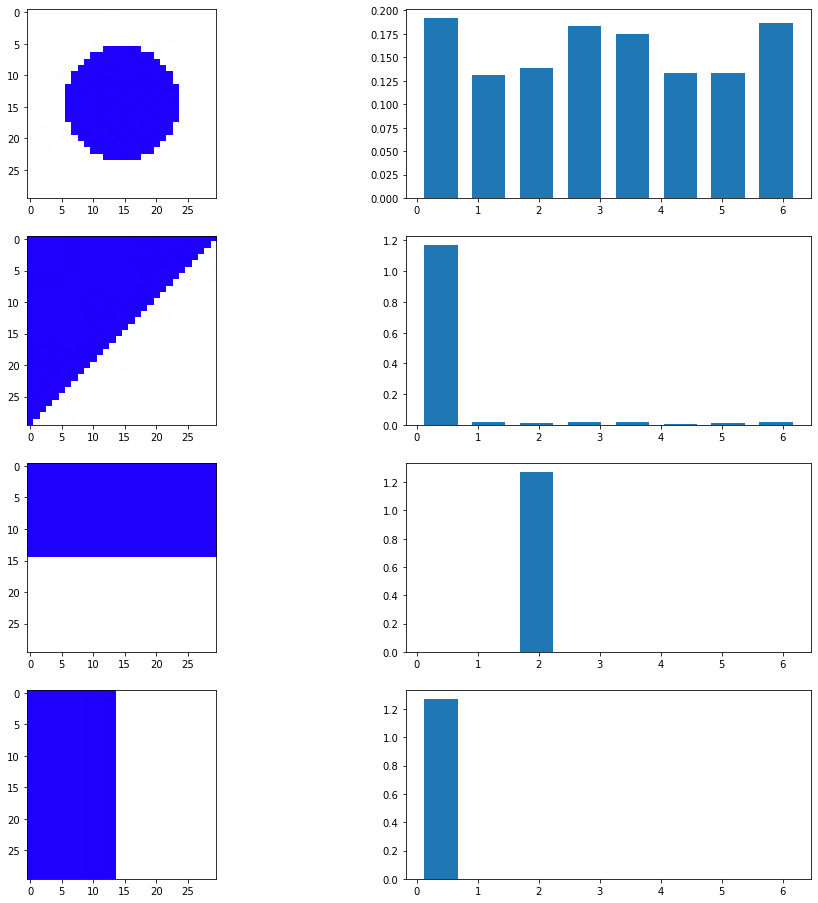

In [69]:
import numpy as np
import cv2
import glob
import math
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 

###############################################################
#
# Write your own descriptor / Histogram of Oriented Gradients
#
###############################################################


def plot_histogram(hist, bins):
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    #plt.show()

def compute_simple_hog(images, keypoints):
    fig = plt.figure(figsize=(16,16))
    no_bins = 8
    bins_list = np.array([i*(2*np.pi/no_bins) for i in range(no_bins+1)])
    
    for pos, imgcolor in enumerate(images):
        # convert color to gray image and extract feature in gray
        img_gray = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
        img_blur = cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT)
        # compute x and y gradients (sobel kernel size 5)
        sobelx32f = cv2.Sobel(img_blur,cv2.CV_32F,1,0,ksize=5)
        sobely32f = cv2.Sobel(img_blur,cv2.CV_32F,0,1,ksize=5)

        # compute magnitude and angle of the gradients
        # 1. compute magnitude of gradients
    #     mog = np.zeros(img_gray.shape)
        mog = cv2.magnitude(sobelx32f,sobely32f)
        ang = cv2.phase(sobelx32f,sobely32f)
        # go through all keypoints and and compute feature vector
        descr = np.zeros((len(keypoints), 8), np.float32)
        count = 0
        for kp in keypoints:
            # print kp.pt, kp.size
            c_x = int(kp.pt[0])
            c_y = int(kp.pt[1])
            c_radius = int(kp.size)    # -> hypothenuse of half the window size
            # compute edge length of window from radius
            # acc. to pythagoras r**2 = a**2 + a**2 = 2 * a**2, since it's a square
            # a = sqrt(r**2/2) 
            # so if the radius equals 11, half of the square is 8x8, which makes the whole square 16x16
    #         rect_half = int(round(np.sqrt((c_radius**2)/2)))
    #         lower_x = c_x - rect_half
    #         upper_x = c_x + rect_half
    #         lower_y = c_y - rect_half
    #         upper_y = c_y + rect_half
    #         # extract gradient magnitude in keypoint subwindow
    #         mog_win = mog[lower_y:upper_y, lower_x:upper_x]
    #         # extract angle in keypoint sub window
    #         ang_win = ang[lower_y:upper_y, lower_x:upper_x]
    #         print("Window Radius:\t",c_radius)
    #         print("Window Size:\t",rect_half*2)
            # extract gradient magnitude in keypoint subwindow
            mog_win = mog[c_y-c_radius:c_y+c_radius, c_x-c_radius:c_x+c_radius]
            # extract angle in keypoint sub window
            ang_win = ang[c_y-c_radius:c_y+c_radius, c_x-c_radius:c_x+c_radius]  
            
            # create histogram of angle in subwindow BUT only where magnitude of gradients is non zero! Why? Find an
            # answer to that question use np.histogram 
            mog_win_not_zero = (mog_win!=0)
    #         print(mog_win)
    #         print(mog_win_not_zero)
            (hist, bins) = np.histogram(ang_win[mog_win_not_zero],8,range=(0,2*np.pi),density=True)
        
            print("================================")
            print("Image No:", pos+1)
            print("Image Shape:\t", imgcolor.shape)
            [print("Key Points:\t", (kp.pt[0], kp.pt[1])) for kp in keypoints]
            print("Window Shape:\t",mog_win.shape)
            
            fig.add_subplot(len(images),1+len(keypoints),(2*pos+1))
            plt.imshow(cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB))
            fig.add_subplot(len(images),1+len(keypoints), (2*pos+2))
            plot_histogram(hist, bins)
            descr[count] = hist
            count += 1
    plt.show()    
    return descr


keypoints = [cv2.KeyPoint(15, 15, 11)]

# test for all test images
# 1. preprocessing and load
image_paths = glob.glob('./images/hog_test/*.jpg')
print(len(image_paths),"query images found!")
images = [cv2.imread(path, 1) for path in image_paths]

descriptor = compute_simple_hog(images, keypoints)


# Exercise 3: Harris Corner Detector (4 Points)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


harris.max()= 443706555295.83997
harris_cv.max()= 21397888.0
DIFF: 0.0


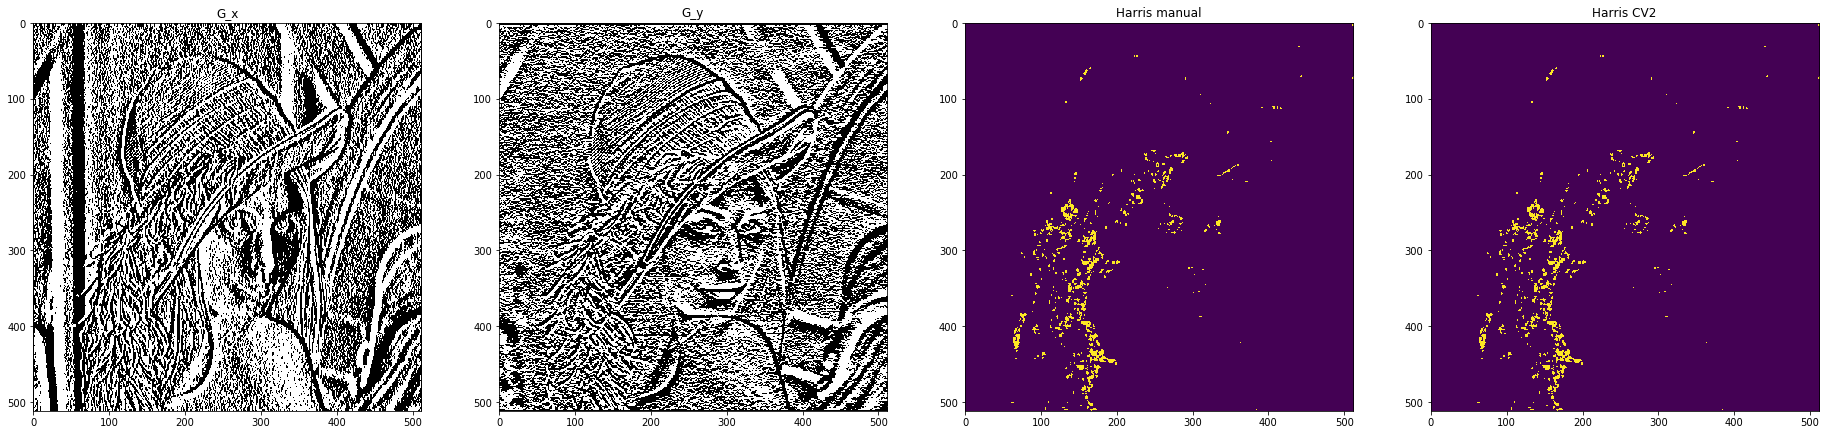

In [67]:
import cv2
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 

# Load image and convert to gray and floating point
img = cv2.imread('./images/Lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Define sobel filter and use cv2.filter2D to filter the grayscale image

# YOUR CODE HERE
sobelmask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelmask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

G_x = cv2.filter2D(gray, cv2.CV_32F, sobelmask_x)
G_y = cv2.filter2D(gray, cv2.CV_32F, sobelmask_y)

# Compute G_xx, G_yy, G_xy and sum over all G_xx etc. 3x3 neighbors to compute
# entries of the matrix M = \sum_{3x3} [ G_xx Gxy; Gxy Gyy ]
# Note1: this results again in 3 images sumGxx, sumGyy, sumGxy
# Hint: to sum the neighbor values you can again use cv2.filter2D to do this efficiently

# YOUR CODE HERE
G_xx = G_x*G_x
G_yy = G_y*G_y
G_xy = G_x*G_y

window = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
sumGxx = cv2.filter2D(G_xx, cv2.CV_32F, window)
sumGyy = cv2.filter2D(G_yy, cv2.CV_32F, window)
sumGxy = cv2.filter2D(G_xy, cv2.CV_32F, window)
       
# Define parameter
k = 0.04
threshold = 0.01

# Compute the determinat and trace of M using sumGxx, sumGyy, sumGxy. With det(M) and trace(M)
# you can compute the resulting image containing the harris corner responses with
# harris = ...

# YOUR CODE HERE
# Note to myself: R equals harris
harris = np.zeros(sumGyy.shape)
for y in range(sumGyy.shape[0]):
    for x in range(sumGyy.shape[1]):
        M = np.array([[sumGxx[y,x],sumGxy[y,x]],[sumGxy[y,x],sumGyy[y,x]]])
        harris[y,x] = np.linalg.det(M)-k*(np.trace(M))**2

# Filter the harris 'image' with 'harris > threshold*harris.max()'
# this will give you the indices where values are above the threshold.
# These are the corner pixel you want to use

# YOUR CODE HERE
harris_thres = np.zeros(harris.shape)
harris_thres[harris>threshold*harris.max()]=[255]
# The OpenCV implementation looks like this - please do not change
harris_cv = cv2.cornerHarris(gray,3,3,k)

# intialize in black - set pixels with corners in with
harris_cv_thres = np.zeros(harris_cv.shape)
harris_cv_thres[harris_cv>threshold*harris_cv.max()]=[255]

# just for debugging to create such an image as seen
# in the assignment figure.
# img[harris>threshold*harris.max()]=[255,0,0]

print("harris.max()=",harris.max())
print("harris_cv.max()=",harris_cv.max())
# please leave this - adjust variable name if desired
print("====================================")
print("DIFF:", np.sum(np.absolute(harris_thres - harris_cv_thres)))
print("====================================")


# cv2.imwrite("Harris_own.png", harris_thres)
# cv2.imwrite("Harris_cv.png", harris_cv_thres)
# cv2.imwrite("Image_with_Harris.png", img)
fig = plt.figure(figsize=(32, 32))
fig.add_subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(G_x,cv2.COLOR_GRAY2RGB))
plt.title("G_x")
fig.add_subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(G_y,cv2.COLOR_GRAY2RGB))
plt.title("G_y")
fig.add_subplot(1, 4, 3)
plt.imshow(harris_thres)
plt.title("Harris manual")
fig.add_subplot(1, 4, 4)
plt.imshow(harris_cv_thres)
plt.title("Harris CV2")
plt.show()